In [14]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
rng = np.random.default_rng(5165)
import arviz as az
az.style.use("default")

# Plot the comparison between dataset and models

In [15]:
model1_accs = [ 99.4  , 84.2  , 70.4 , 71.5]# , 67.3] # M2v0
model2_accs = [ 99.6  , 99.2  , 79.1 , 79.2]# , 71.5] # M2v2
model3_accs = [ 99.6  , 84.1  , 87.7 , 78.8]# , 67.3] # M3v0
model4_accs = [ 99.6  , 99.5  , 97.7 , 92.6]# , 73.7] # M3v2
model5_accs = [ 99.3  , 99.4  , 97.1 , 97.4]# , 74.0] # M3v8
model6_accs = [] # M3v8
model_accs =  [] # M3v10

model1_yerr = [0.1 , 1.5, 1.3, 1.4] #, 0.14]
model2_yerr = [0.1 , 0.1, 1.4, 1.1] #, 0.12]
model3_yerr = [0.07, 1.6, 1.3, 2.6] #, 0.15]
model4_yerr = [0.04, 0.05, 0.2, 4.6] #, 0.13]
model5_yerr = [0.3, 0.04, 0.3, 0.05] #, 0.17]

final name | vari | features                                         | D1+(STD) | D2+(STD) | D3+(STD) | D4       | 
---------- | ---- | ------------------------------------------------ | -------- | -------- | -------- | -------- |
  M2       | M2v0 | -                                                | 99.4     | 84.2     | 70.4     | 71.5     |
  M3       | M2v2 | focus field                                      | 99.6     | 99.2     | 79.1     | 79.2     |
  M4       | M3v0 | user                                             | 99.6     | 84.1     | 87.7     | 78.8     |
  M5       | M3v2 | user + focus field                               | 99.6     | 99.5     | 97.7(+.2)|92.6(+4.6)|
  M6       | M3v8 | user + focus field + object state                | 99.3(+.3)| 99.4(+.04)|97.1(+.3)|97.4      |

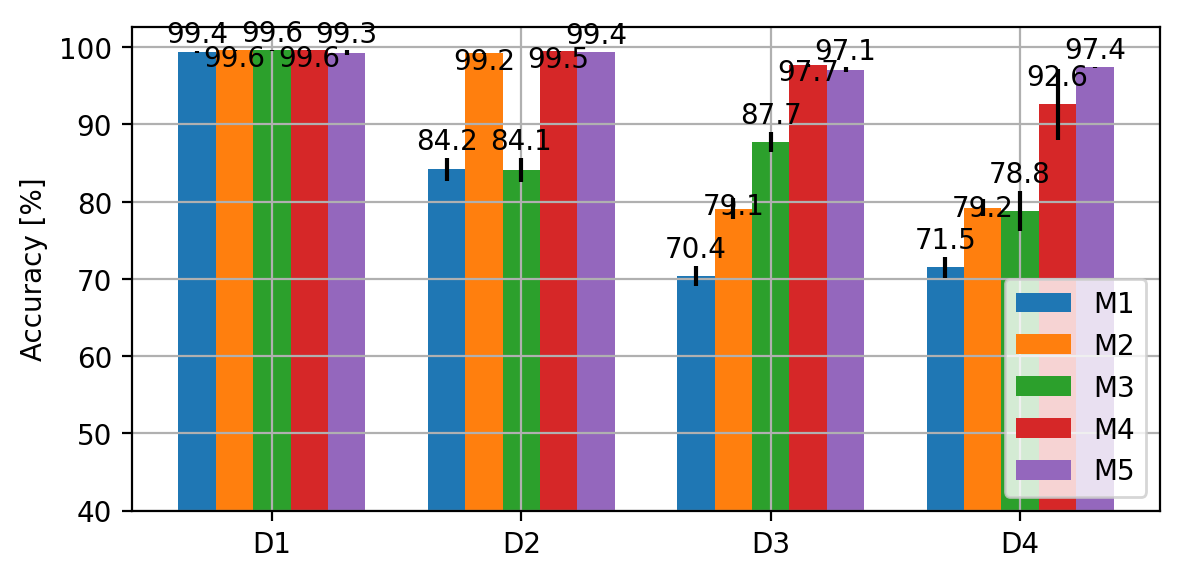

In [16]:
labels = ['D1', 'D2', 'D3', 'D4']#, '$D3_{multi}$']

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

model1_accs = np.array(model1_accs) - 40
model2_accs = np.array(model2_accs) - 40
model3_accs = np.array(model3_accs) - 40
model4_accs = np.array(model4_accs) - 40
model5_accs = np.array(model5_accs) - 40

fig, ax = plt.subplots()
rects1 = ax.bar(x - 2*width, model1_accs, width, yerr=model1_yerr, label='M1', bottom=40)
rects2 = ax.bar(x - 1*width, model2_accs, width, yerr=model2_yerr,  label='M2', bottom=40)
rects3 = ax.bar(x + 0*width, model3_accs, width, yerr=model3_yerr,  label='M3', bottom=40)
rects4 = ax.bar(x + 1*width, model4_accs, width, yerr=model4_yerr,  label='M4', bottom=40)
rects5 = ax.bar(x + 2*width, model5_accs, width, yerr=model5_yerr,  label='M5', bottom=40)



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy [%]')
ax.set_xticks(x, labels)
ax.legend(loc='lower right')

ax.bar_label(rects1, padding=1)
ax.bar_label(rects2, padding=-8)
ax.bar_label(rects3, padding=1)
ax.bar_label(rects4, padding=-8)
ax.bar_label(rects5, padding=1)

plt.grid()
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

fig.set_size_inches(6, 3)

fig.tight_layout()
plt.savefig("/home/petr/Pictures/cbgo_model_comparison_accuracies_3.pdf")
plt.show()

# Model accuracy based on number of scene samples

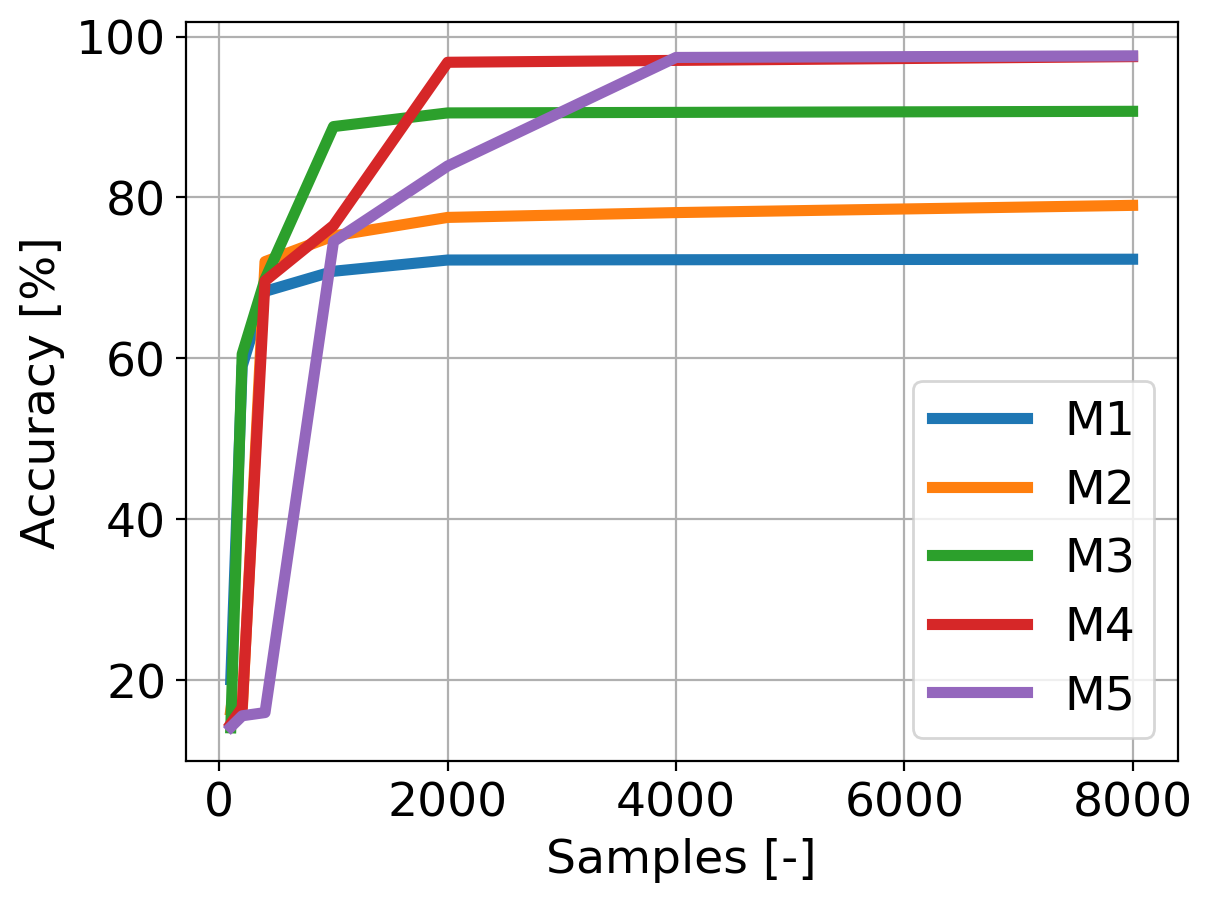

In [19]:
s_M2 = [100, 200, 400, 1000, 2000, 8000] # M2v0
a_M2 = [20,  59, 68.3, 70.8, 72.2, 72.3]

s_M3 = [100, 200, 400, 1000, 2000, 4000, 8000] # M2v2
a_M3 = [16.2,16., 72 , 75.2, 77.5, 78.1, 79.0]

s_M4 = [100, 200, 400, 1000, 2000, 8000] # M3v0
a_M4 = [14., 60.5,69.8,88.8,90.5, 90.7 ]

s_M5 = [100, 200, 400, 1000, 2000, 8000] # M3v2
a_M5 = [14.5,16.5,69.6,76.5,96.8,97.5  ]

s_M6 = [100, 200, 400, 1000, 2000, 4000,8000] # M3v8
a_M6 = [14.1,15.5,15.9,74.5,83.9,97.4,97.6]


plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.plot(s_M2, a_M2, linewidth=4)
plt.plot(s_M3, a_M3, linewidth=4)

plt.plot(s_M4, a_M4, linewidth=4)
plt.plot(s_M5, a_M5, linewidth=4)
plt.plot(s_M6, a_M6, linewidth=4)
plt.grid()
plt.xlabel("Samples [-]")
plt.ylabel("Accuracy [%]")
plt.rcParams.update({'font.size': 17})
plt.legend(['M1','M2','M3','M4','M5'])
plt.savefig('/home/petr/Pictures/cbgo_accuracy_on_samples_3.pdf', bbox_inches='tight')

In [29]:
A = np.array(
[[2000, 14.94, 15.2], 
[4000, 16.74, 17.67], 
[6000, 20.44, 21.83], 
[8000, 23.14, 23.37], 
[10000, 27.01, 32.4], 
[12000, 39.49, 37.97], 
[14000, 52.2, 51.27], 
[16000, 64.77, 64.03], 
[18000, 71.46, 70.57], 
[20000, 72.86, 72.03], 
[22000, 75.9, 74.23], 
[24000, 76.89, 75.73], 
[26000, 78.3, 76.77],
[28000, 79.21,78.73],
[30000, 79.79,78.2],
[32000, 79.77,81.17],
[34000, 80.17, 80.0],
[36000, 80.89, 81.9],
[38000, 82.56, 83.33],
[40000, 83.21, 83.1],
[42000, 85.29, 85.03],
[44000, 86.14, 85.77],
[46000, 86.33, 86.27],
[48000, 87.23, 87.0],
[50000, 87.17, 87.63],
[52000, 88.54, 88.3],
[54000, 88.61, 89.33],
[56000, 89.04, 89.3],
[58000, 90.59, 91.13],
[60000, 93.44, 94.17],
[62000, 96.06, 96.4],
[64000, 96.37, 97.17],
[66000, 96.77, 97.07],
[68000, 96.83, 97.43],
[70000, 96.93, 97.77],
[72000, 97.04, 97.87],
[74000, 97.11, 97.67],
[76000, 97.4, 97.63],
[78000, 97.2, 97.87],
[80000, 97.37, 97.77],
[82000, 97.4, 97.9],
[84000, 97.09, 97.83],
[86000, 97.34, 98.2],
[88000, 97.4, 97.77],
[90000, 96.99, 97.87],
[92000, 97.39, 97.73],
[94000, 97.07, 97.77],
[96000, 97.23, 98.0],
[98000, 97.39, 97.77],
[100000, 97.37, 97.9]]
            )

### Difference between the train and test data accuracy

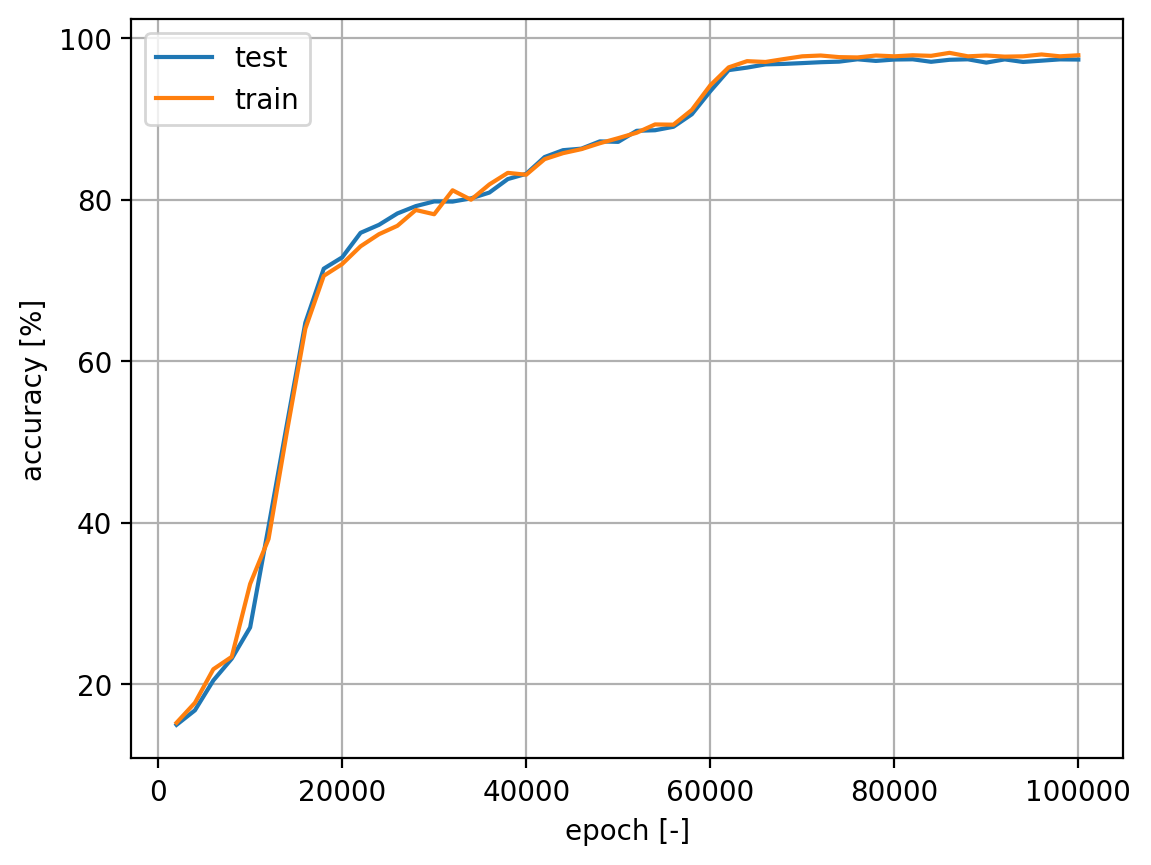

In [32]:
plt.plot(A[:,0], A[:,1:3])
plt.legend(['test','train'])
plt.xlabel('epoch [-]')
plt.ylabel('accuracy [%]')
plt.grid()